# Project 1: Data analysis

- Topic: Suicide rates overview from 1985-2015 (2016)


### Loading in necessary python packages

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score, mean_squared_error
#import AllTogether as t
import seaborn as sns
%matplotlib inline



### Loading in the dataset

In [11]:
df = pd.read_csv('suicide_rates_overview_1985_2016.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Basic data checks

In [12]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [44]:
# check amount of rows and columns
num_rows = df.shape[0] #Provide the number of rows in the dataset
num_cols = df.shape[1] #Provide the number of columns in the dataset

print("Amount of rows is " + str(num_rows) + " long")
print ("Amount of columns is " + str(num_cols) + " long")

Amount of rows is 27820 long
Amount of columns is 12 long


#### check for categorical variables

In [66]:
data_types = df.dtypes
data_types

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [68]:
object_types = df.select_dtypes(include=['object'])
object_types.head(1)

,country,sex,age,country-year,gdp_for_year ($),generation
0,Albania,male,15-24 years,Albania1987,"2,156,624,900",Generation X


In [69]:
# 6 categorical variables

#### check any missing values in df

In [46]:


no_nulls = set(df.columns[df.isnull().mean()==0]) #Provide a set of columns with 0 missing values.

no_nulls

{' gdp_for_year ($) ',
 'age',
 'country',
 'country-year',
 'gdp_per_capita ($)',
 'generation',
 'population',
 'sex',
 'suicides/100k pop',
 'suicides_no',
 'year'}

In [49]:
missing_val= np.sum(np.sum(df.isnull())/df.shape[0] == 0)# Cell for your work here
missing_val

11

In [52]:
# One column has missing values in the dataset
#The name of the column is: HDI for year


27809

## Deeper analysis of "HDI for year" column

In [54]:
# deeper analysis of HDI column
df_hdi = df[["year", "country", "HDI for year"]]
df_hdi.head(5)

,year,country,HDI for year
0,1987,Albania,NaN
1,1987,Albania,NaN
2,1987,Albania,NaN
3,1987,Albania,NaN
4,1987,Albania,NaN


In [56]:
#check when NaN appears:
df_hdi1 = sum(df["HDI for year"].value_counts())
df_hdi1

8364

In [58]:
# Total is 27809 and only 8364 values other than NaN appear for HDI column

prop_sals = 1 - (sum(df_hdi["HDI for year"].isnull())/len(df_hdi["HDI for year"]))
prop_sals


0.30064701653486703

In [59]:
#Only around 30% have values for this column.
#Let us check when it happened:
df_hdi2  = df_hdi.loc[df_hdi["HDI for year"].notnull(), ["year","country"]]
df_hdi2.head()

,year,country
72,1995,Albania
73,1995,Albania
74,1995,Albania
75,1995,Albania
76,1995,Albania


In [60]:
df_hdi3 = df_hdi2["year"].value_counts()
df_hdi3

2010    1008
2011     972
2012     936
2013     924
2005     912
2000     912
2014     900
1995     756
1990     600
1985     444
Name: year, dtype: int64

In [ ]:
#given unregularity of data availability of column "HDI for year", the column will be dropped completely for ongoing research.

## Set up final working table

- drop the column "HDI for year" from original dataframe table

In [71]:
df_1 = df.drop(columns=["HDI for year"])
df_1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [72]:
#Final working table has 11 columns instead of 12 after dropping not needed column "HDI for year"

In [177]:
#clean up column names:
df_1 = df_1.rename(columns={"suicides/100k pop": "suicides_100k_pop", "country-year": "country_year", 
                     "gdp_for_year ($)": "gdp_for_year_$", "gdp_per_capita ($)": "gdp_per_capita_$"})

df_1.head(5)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,gdp_for_year ($),gdp_per_capita_$,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


## First insight: Compare total of the year range with the deaths/100k

#(give a brief overview of 10-15 biggest country) 

### Check total deaths and deaths by sex in year range 

In [83]:
total_deaths_sex = df_1.pivot_table('suicides_no', index='year',
                                  columns='sex',aggfunc=sum)
total_deaths_sex.head(5)

sex,female,male
year,,
1985,32479,83584
1986,33852,86818
1987,35006,91836
1988,33015,88011
1989,41361,118883


In [85]:
total_deaths_tot = df_1.pivot_table('suicides_no', index='year',aggfunc=sum)

total_deaths_tot.head(5) 

,suicides_no
year,
1985,116063
1986,120670
1987,126842
1988,121026
1989,160244


In [97]:
#join dfs of sex and total into one df

df_deaths_one = total_deaths_sex.join(total_deaths_tot, on = "year", how="left")
#after inspecting the last date 2016, it seems not all data were available, as the cases reported dropped massively.
#Thus, I only considered the range 1985 - 2015 for my analysis.
df_deaths_one = df_deaths_one.iloc[:-1,:]
df_deaths_one

,female,male,suicides_no
year,,,
1985,32479,83584,116063
1986,33852,86818,120670
1987,35006,91836,126842
1988,33015,88011,121026
1989,41361,118883,160244
1990,50118,143243,193361
1991,49622,148398,198020
1992,51567,159906,211473
1993,51331,170234,221565


In [108]:
#max value of deaths for total

max_tot = df_deaths_one["suicides_no"].max()
print("max tot: " + str(max_tot))

#min value of deaths for total

min_tot = df_deaths_one["suicides_no"].min()
print("min tot: " + str(min_tot))

#max value of deaths for men

max_men = df_deaths_one["male"].max()
print("max men: " + str(max_men))

#min value of deaths for men

min_men = df_deaths_one["male"].min()
print("min men: " + str(min_men))

#max value of deaths for female

max_female = df_deaths_one["female"].max()
print("max female: " + str(max_female))

#min value of deaths for female

min_female = df_deaths_one["female"].min()
print("min female: " + str(min_female))


max tot: 256119
min tot: 116063
max men: 200578
min men: 83584
max female: 56215
min female: 32479


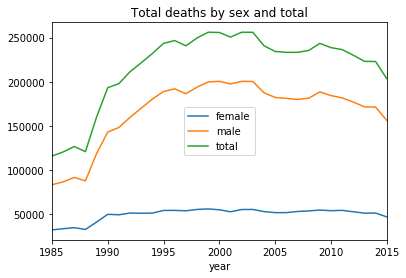

In [96]:
df_deaths_one.plot(title='Total deaths by sex and total')
L=plt.legend()
L.get_texts()[2].set_text('total')

### Check total suicides/100k and by sex  in year range 

In [178]:
deaths_100k = df_1.pivot_table('suicides_100k_pop', index='year',
                                  columns='sex',aggfunc=sum)
deaths_100k.head(5)

sex,female,male
year,,
1985,1663.75,5148.14
1986,1674.05,4905.79
1987,1857.21,5688.24
1988,1859.08,5614.05
1989,1927.17,6109.37


In [179]:
deaths_100k_tot = df_1.pivot_table('suicides_100k_pop', index='year',aggfunc=sum)

deaths_100k_tot.head(5) 

,suicides_100k_pop
year,
1985,6811.89
1986,6579.84
1987,7545.45
1988,7473.13
1989,8036.54


In [103]:
#join dfs of sex and total into one df

deaths_100k_one = deaths_100k.join(deaths_100k_tot, on = "year", how="left")
#after inspecting the last date 2016, it seems not all data were available, as the cases reported dropped massively.
#Thus, I only considered the range 1985 - 2015 for my analysis.
deaths_100k_one = deaths_100k_one.iloc[:-1,:]
deaths_100k_one

,female,male,suicides/100k pop
year,,,
1985,1663.75,5148.14,6811.89
1986,1674.05,4905.79,6579.84
1987,1857.21,5688.24,7545.45
1988,1859.08,5614.05,7473.13
1989,1927.17,6109.37,8036.54
1990,2268.29,7610.46,9878.75
1991,2314.74,8006.32,10321.06
1992,2437.37,8091.51,10528.88
1993,2352.19,8438.10,10790.29


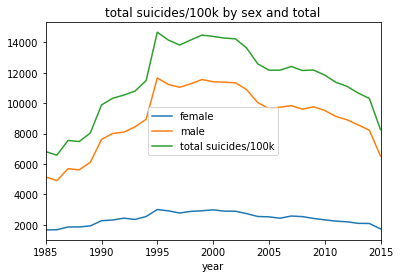

In [105]:
deaths_100k_one.plot(title='total suicides/100k by sex and total')
L=plt.legend()
L.get_texts()[2].set_text('total suicides/100k')

## Question 2: macro-level is there any trend to see overall on global scale?

- specific trends in different generations and genders globally

In [180]:
df_1.head()

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,gdp_for_year ($),gdp_per_capita_$,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


### break down by sex

### break down deaths total by sex

In [114]:
# take df from before: total_deaths_sex.head(5)


#total deaths by sex
total_deaths_sex.head(5)

sex,female,male
year,,
1985,32479,83584
1986,33852,86818
1987,35006,91836
1988,33015,88011
1989,41361,118883


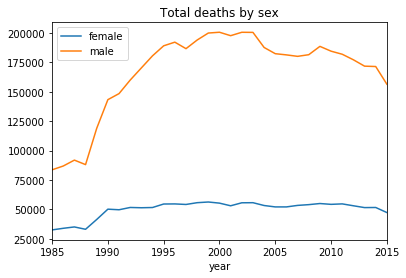

In [113]:
#plot by sex witohout total:
total_deaths_sex = total_deaths_sex.iloc[:-1,:]
total_deaths_sex


total_deaths_sex.plot(title='Total deaths by sex')
L=plt.legend()
#L.get_texts()[2].set_text('total')



### break down by sex and deaths by 100k

In [181]:
# take df from before: deaths_100k


#total deaths by 100k and sex
deaths_100k.head(5)

deaths_100k = df_1.pivot_table('suicides_100k_pop', index='year',
                                  columns='sex',aggfunc=sum)
deaths_100k.head(5)

sex,female,male
year,,
1985,1663.75,5148.14
1986,1674.05,4905.79
1987,1857.21,5688.24
1988,1859.08,5614.05
1989,1927.17,6109.37


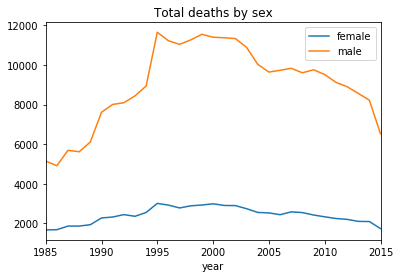

In [116]:
#plot by sex witohout total:
deaths_100k = deaths_100k.iloc[:-1,:]
deaths_100k


deaths_100k.plot(title='Total deaths by sex')
L=plt.legend()
#L.get_texts()[2].set_text('total')



### break down by age group

In [117]:
df_1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [123]:
#take sucidies/100k pop ratio for remaining analysis, as it is easier to compare with

In [182]:
age_group = df_1.pivot_table('suicides_100k_pop', index='year',
                                  columns='age',aggfunc=sum)

#re-order columns by age group ascending:

age_group = age_group[["5-14 years","15-24 years", "25-34 years", "35-54 years","55-74 years", "75+ years"]]
age_group.head(5)

age,5-14 years,15-24 years,25-34 years,35-54 years,55-74 years,75+ years
year,,,,,,
1985,51.56,809.25,960.84,1190.69,1449.06,2350.49
1986,40.46,782.60,1017.01,1122.76,1340.64,2276.37
1987,52.36,808.69,1183.72,1337.43,1614.15,2549.10
1988,46.79,857.59,1216.19,1291.25,1552.62,2508.69
1989,57.56,952.69,1266.53,1412.79,1664.04,2682.93


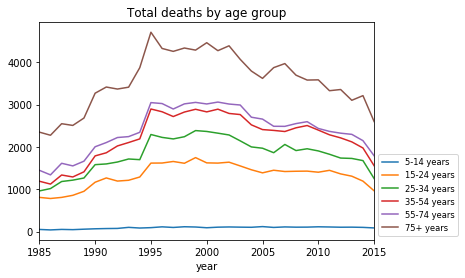

In [145]:
#plot by sex witohout total:
age_group = age_group.iloc[:-1,:]
age_group


age_group.plot(title='Total deaths by age group')
L=plt.legend(loc='lower left', fontsize='small',bbox_to_anchor=(1.0, 0))
#L.get_texts()[2].set_text('total')

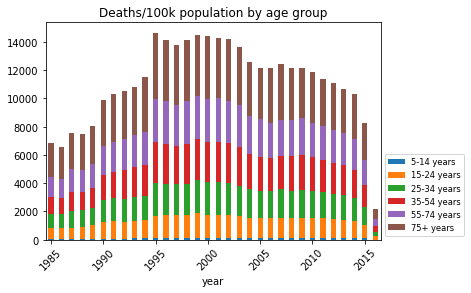

In [183]:
# bar chart
#x = [0, 5, 10,15,20,25,30]
#positions = (1, 2, 3, 4, 5, 6, 7)
#labels = ("1985", "1990", "1995", "2000", "2005", "2010", "2015")
#plt.xticks(positions, labels)
(age_group).plot(kind="bar", stacked= True);
L=plt.legend(loc='lower left', fontsize='small',bbox_to_anchor=(1.0, 0));
plt.title("Deaths/100k population by age group");
positions = (0, 5, 10,15,20,25,30)
labels = ("1985", "1990", "1995", "2000", "2005", "2010", "2015")
plt.xticks(positions, labels, rotation=45,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center');

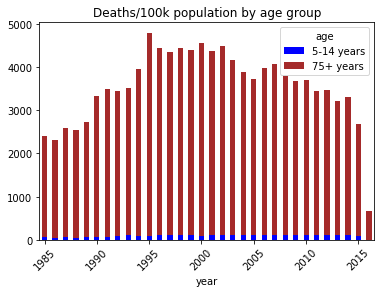

In [184]:
#show only two extreme sub-groups (5-14 years and 75+ years)
age_group_extremes = age_group[["5-14 years","75+ years"]]
                                
# bar chart
#x = [0, 5, 10,15,20,25,30]
#positions = (1, 2, 3, 4, 5, 6, 7)
#labels = ("1985", "1990", "1995", "2000", "2005", "2010", "2015")
#plt.xticks(positions, labels)
(age_group_extremes).plot(kind="bar", stacked= True, color = ['blue', 'brown'], grid=False);
#L=plt.legend(loc='lower left', fontsize='small',bbox_to_anchor=(1.0, 0));
plt.title("Deaths/100k population by age group");
positions = (0, 5, 10,15,20,25,30)
labels = ("1985", "1990", "1995", "2000", "2005", "2010", "2015")
plt.xticks(positions, labels, rotation=45,
         horizontalalignment='center',
         verticalalignment='top',
         multialignment='center');


## Insight 3: micro-level: 
What is the best and what is the worst performing country?
for each age range/gender and generation group by year and country

on the micro-level:correlation with gdp and deaths -> any hints for this?

### show top 10 and lowest 10 countries countries each ten years (4 times)


##### do analysis for 1985

In [170]:
df_1.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [ ]:
#rename column 

In [195]:
#group by country and year ->sum suicides/100k

var = df_1.groupby(['country','year']).count().reset_index()
#var_1 = var[var["country"]== "Albania"]
#ed_1 = df[df['HigherEd'] == 1]
var.head(5)

,country,year,sex,age,suicides_no,population,suicides_100k_pop,country_year,gdp_for_year ($),gdp_per_capita_$,generation
0,Albania,1987,12,12,12,12,12,12,12,12,12
1,Albania,1988,12,12,12,12,12,12,12,12,12
2,Albania,1989,12,12,12,12,12,12,12,12,12
3,Albania,1992,12,12,12,12,12,12,12,12,12
4,Albania,1993,12,12,12,12,12,12,12,12,12


In [203]:
#little data analysis
var = df_1.groupby(['country','year']).suicides_100k_pop.sum().reset_index()
#var

var_1 = var[var["country"]== "Uruguay"]
var_1

,country,year,suicides_100k_pop
2271,Uruguay,1985,178.61
2272,Uruguay,1986,172.47
2273,Uruguay,1987,164.43
2274,Uruguay,1988,164.46
2275,Uruguay,1989,196.46
2276,Uruguay,1990,180.67
2277,Uruguay,1993,223.02
2278,Uruguay,1994,214.00
2279,Uruguay,1995,237.94
2280,Uruguay,1996,187.93


#### Calculate Top 10 countries for 1985, 1995, 2005 and 2015

In [221]:
#top 10 for year 1985
var_1985 = var[var["year"]== 1985]

var_1985 = var_1985.sort_values(by='suicides_100k_pop', ascending=False)

max_1985 = var_1985.head(10)
#only selected required columns
max_1985 = max_1985[["country", "suicides_100k_pop"]] 
max_1985 

#reset index
max_1985 = max_1985.set_index('country')
max_1985

##########

#top 10 for year 1995
var_1995 = var[var["year"]== 1995]

var_1995 = var_1995.sort_values(by='suicides_100k_pop', ascending=False)

max_1995 = var_1995.head(10)
#only selected required columns
max_1995 = max_1995[["country", "suicides_100k_pop"]] 
max_1995 

#reset index
max_1995 = max_1995.set_index('country')
max_1995

##########

#top 10 for year 2005
var_2005 = var[var["year"]== 2005]

var_2005 = var_2005.sort_values(by='suicides_100k_pop', ascending=False)

max_2005 = var_2005.head(10)
#only selected required columns
max_2005 = max_2005[["country", "suicides_100k_pop"]] 
max_2005 

#reset index
max_2005 = max_2005.set_index('country')
max_2005

##########

#top 10 for year 2015
var_2015 = var[var["year"]== 2015]

var_2015 = var_2015.sort_values(by='suicides_100k_pop', ascending=False)

max_2015 = var_2015.head(10)
#only selected required columns
max_2015 = max_2015[["country", "suicides_100k_pop"]] 
max_2015 

#reset index
max_2015 = max_2015.set_index('country')
max_2015

##########



,suicides_100k_pop
country,
Republic of Korea,389.14
Lithuania,385.48
Uruguay,270.02
Slovenia,264.81
Hungary,257.27
Latvia,251.47
Ukraine,244.72
Kazakhstan,238.02
Russian Federation,236.92


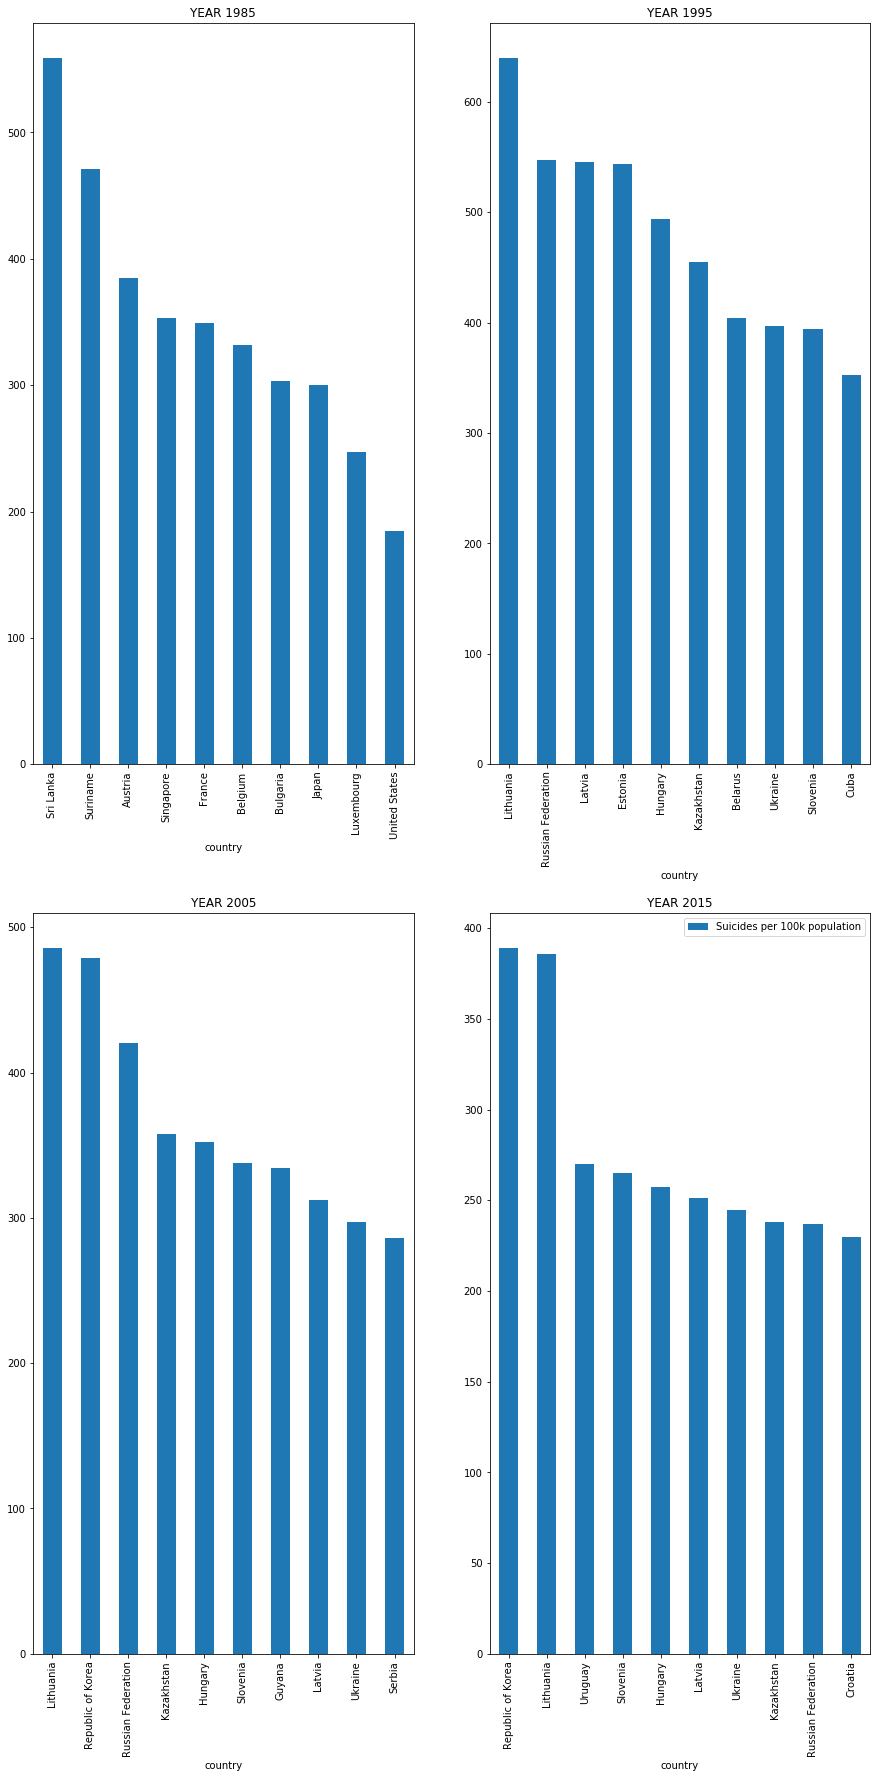

In [263]:
fig, axes = plt.subplots(nrows=2, ncols=2)

max_1985.plot(ax=axes[0,0], kind='bar', title = "YEAR 1985", legend = False)
max_1995.plot(ax=axes[0,1], kind='bar', title = "YEAR 1995",legend = False)
max_2005.plot(ax=axes[1,0], kind='bar', title = "YEAR 2005", legend = False)
max_2015.plot(ax=axes[1,1], kind='bar', title = "YEAR 2015", legend = False)

#plt.title("YEAR 1985: Top 10 with highest suicide rate per 100k");
L=plt.legend()
L.get_texts()[0].set_text('Suicides per 100k population')
fig.set_figheight(30)
fig.set_figwidth(15)
#plt.figlegend( "test", loc = 'lower center', borderaxespad=0.1, ncol=6, labelspacing=0.,  prop={'size': 13} ) #bbox_to_anchor=(0.5, 0.0), borderaxespad=0.1, 


In [264]:
#top 10 for year 1985
var_1985 = var[var["year"]== 1985]

var_1985 = var_1985.sort_values(by='suicides_100k_pop', ascending=True)

min_1985 = var_1985.head(10)
#only selected required columns
min_1985 = min_1985[["country", "suicides_100k_pop"]] 
min_1985 

#reset index
min_1985 = min_1985.set_index('country')
min_1985

,suicides_100k_pop
country,
Antigua and Barbuda,0.00
Dominica,0.00
Bahamas,4.76
Malta,8.76
Jamaica,9.04
Kuwait,11.20
Bahrain,20.12
Grenada,25.08
Trinidad and Tobago,30.17


#### Calculate Lowest 10 countries for 1985, 1995, 2005 and 2015

In [266]:
#lowest 10 for year 1985
var_1985 = var[var["year"]== 1985]

var_1985 = var_1985.sort_values(by='suicides_100k_pop', ascending=True)

min_1985 = var_1985.head(10)
#only selected required columns
min_1985 = min_1985[["country", "suicides_100k_pop"]] 
min_1985 

#reset index
min_1985 = min_1985.set_index('country')
min_1985

##########

#lowest for year 1995
var_1995 = var[var["year"]== 1995]

var_1995 = var_1995.sort_values(by='suicides_100k_pop', ascending=True)

min_1995 = var_1995.head(10)
#only selected required columns
min_1995 = min_1995[["country", "suicides_100k_pop"]] 
min_1995 

#reset index
min_1995 = min_1995.set_index('country')
min_1995

##########

#lowest for year 2005
var_2005 = var[var["year"]== 2005]

var_2005 = var_2005.sort_values(by='suicides_100k_pop', ascending=True)

min_2005 = var_2005.head(10)
#only selected required columns
min_2005 = min_2005[["country", "suicides_100k_pop"]] 
min_2005 

#reset index
min_2005 = min_2005.set_index('country')
min_2005

##########

#lowest for year 2015
var_2015 = var[var["year"]== 2015]

var_2015 = var_2015.sort_values(by='suicides_100k_pop', ascending=True)

min_2015 = var_2015.head(10)
#only selected required columns
min_2015 = min_2015[["country", "suicides_100k_pop"]] 
min_2015 

#reset index
min_2015 = min_2015.set_index('country')
min_2015

##########



,suicides_100k_pop
country,
Grenada,0.00
South Africa,13.00
Antigua and Barbuda,15.62
Qatar,18.84
Saint Vincent and Grenadines,28.08
Turkey,28.47
Turkmenistan,28.48
Guatemala,44.85
Panama,44.90


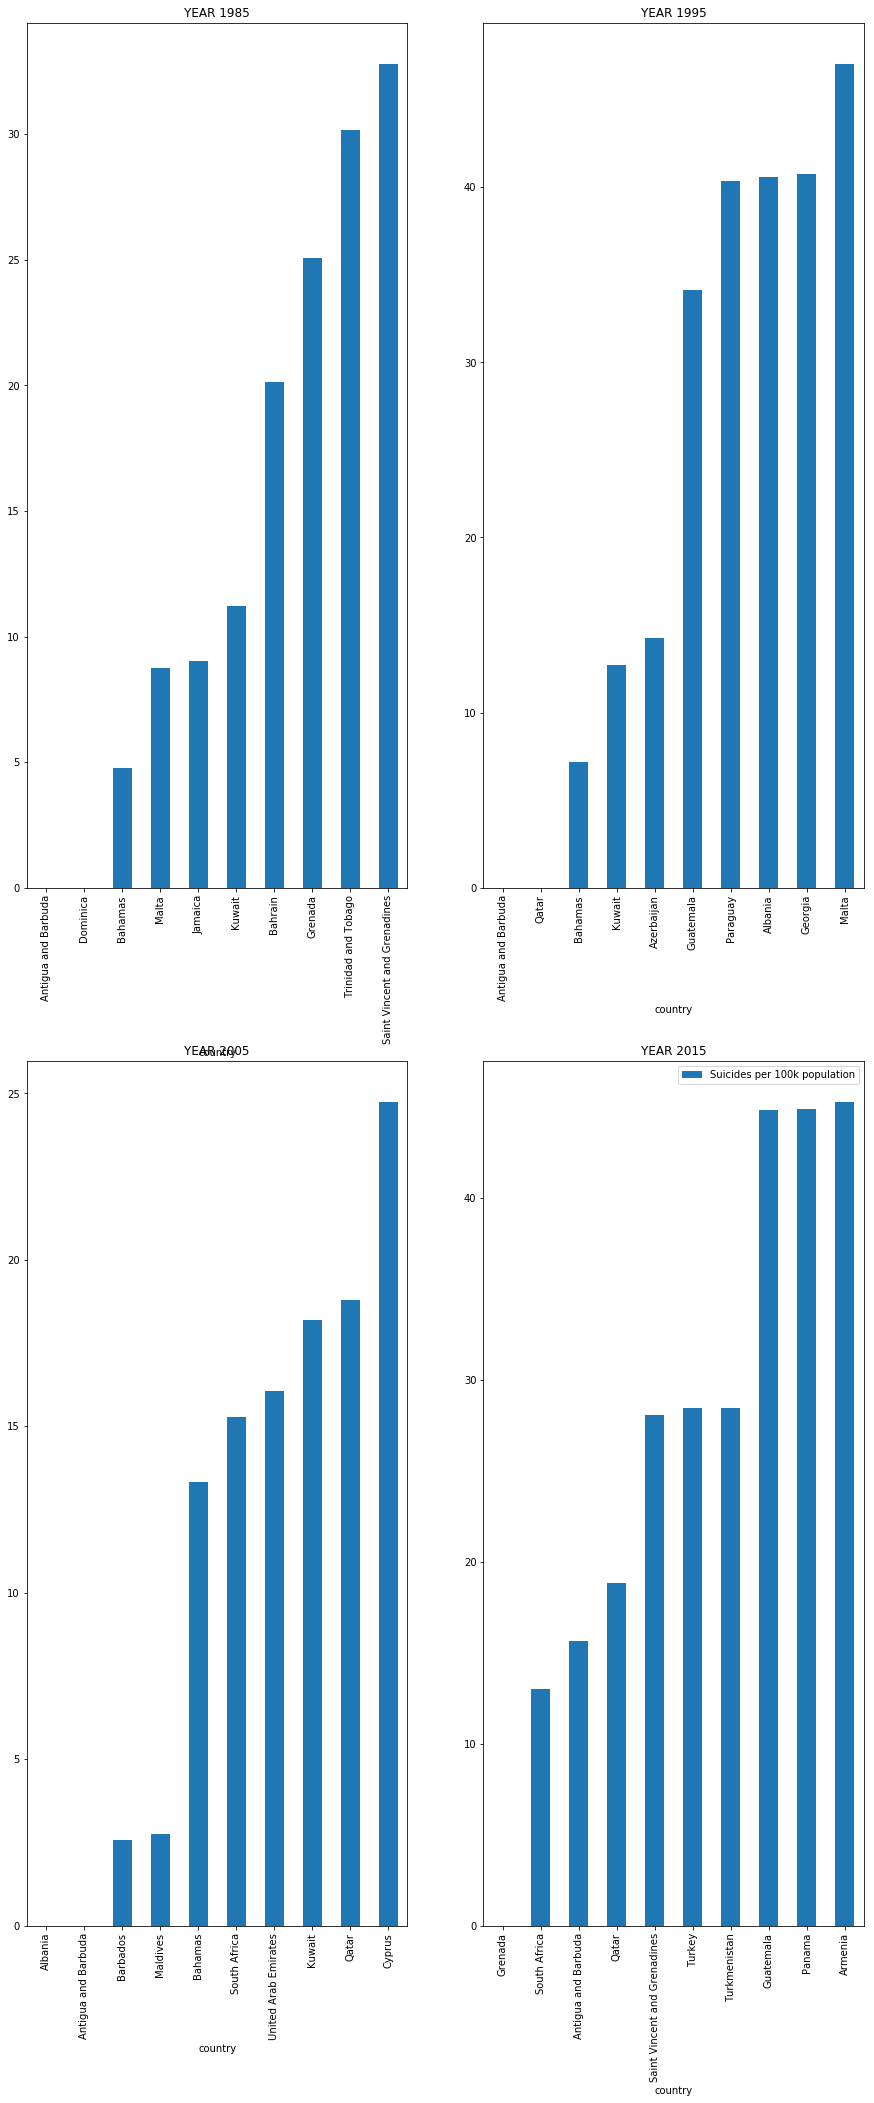

In [275]:
fig, axes = plt.subplots(nrows=2, ncols=2)

min_1985.plot(ax=axes[0,0], kind='bar', title = "YEAR 1985", legend = False)
min_1995.plot(ax=axes[0,1], kind='bar', title = "YEAR 1995",legend = False)
min_2005.plot(ax=axes[1,0], kind='bar', title = "YEAR 2005", legend = False)
min_2015.plot(ax=axes[1,1], kind='bar', title = "YEAR 2015", legend = False)

#plt.title("YEAR 1985: Top 10 with highest suicide rate per 100k");
L=plt.legend()
L.get_texts()[0].set_text('Suicides per 100k population')
fig.set_figheight(35)
fig.set_figwidth(15)
#plt.figlegend( "test", loc = 'lower center', borderaxespad=0.1, ncol=6, labelspacing=0.,  prop={'size': 13} ) #bbox_to_anchor=(0.5, 0.0), borderaxespad=0.1, 
